# Word2Vec - Skipgram (Softmax)

<div align="center">
  <a href="https://colab.research.google.com/github/Coder-Starcom/NLP/blob/main/Word2Vec-Skipgram(Softmax).ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
  </a>
</div>

## 🧠 What is Word2Vec (Skip-gram)?

The **Skip-gram model** in Word2Vec tries to predict the **context words** given a **center word**.

For example, in the sentence:

> "apple banana fruit"

If `"banana"` is the center word, then `"apple"` and `"fruit"` are its context words (within a window of 1).

The model learns to represent words as **dense vectors (embeddings)** such that similar words are close together in vector space.


## ✅ High-Level Overview of This Code

| Component             | Purpose                                         |
| --------------------- | ----------------------------------------------- |
| One-hot input         | Feed each center word as a one-hot vector       |
| Neural net (2 layers) | Projects one-hot → embedding → vocab scores     |
| CrossEntropyLoss      | Acts as Softmax + log loss                      |
| Skip-gram generation  | Constructs (center, context) pairs              |
| Random sampling       | Batches of skip-grams used for training         |
| Visualization (2D)    | Shows final word vectors as points on a 2D plot |

## 📘 1: Imports

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 📘 2: Data Setup

In [23]:
sentences = ['elephant lion animal',
 'bread milk food',
 'grape melon fruit',
 'peach grape fruit',
 'cat dog animal',
 'apple melon fruit',
 'bear cat animal',
 'zebra bear animal',
 'milk egg food',
 'melon kiwi fruit',
 'butter coffee food',
 'grape melon fruit',
 'chocolate yogurt food',
 'zebra monkey animal',
 'bread yogurt food',
 'tiger dog animal',
 'coffee bread food',
 'melon grape fruit',
 'kiwi banana fruit',
 'zebra bear animal',
 'apple grape fruit',
 'yogurt chocolate food',
 'bread coffee food',
 'peach mango fruit',
 'butter cheese food',
 'zebra dog animal',
 'elephant zebra animal',
 'grape peach fruit',
 'melon apple fruit',
 'dog tiger animal',
 'bear zebra animal',
 'butter yogurt food',
 'coffee chocolate food',
 'orange banana fruit',
 'yogurt chocolate food',
 'grape melon fruit',
 'apple melon fruit',
 'tiger elephant animal',
 'grape kiwi fruit',
 'mango kiwi fruit',
 'egg cheese food',
 'peach mango fruit',
 'chocolate bread food',
 'butter yogurt food',
 'bear dog animal',
 'melon orange fruit',
 'bear lion animal',
 'egg bread food',
 'cheese coffee food',
 'zebra elephant animal',
 'tiger lion animal',
 'cat bear animal',
 'melon orange fruit',
 'bear zebra animal',
 'kiwi orange fruit',
 'grape kiwi fruit',
 'lion monkey animal',
 'monkey zebra animal',
 'dog elephant animal',
 'yogurt butter food',
 'butter egg food',
 'banana grape fruit',
 'melon apple fruit',
 'orange kiwi fruit',
 'melon apple fruit',
 'elephant bear animal',
 'grape peach fruit',
 'dog zebra animal',
 'dog elephant animal',
 'lion dog animal',
 'cheese egg food',
 'milk butter food',
 'banana apple fruit',
 'zebra monkey animal',
 'cheese egg food',
 'orange mango fruit',
 'orange apple fruit',
 'lion zebra animal',
 'mango kiwi fruit',
 'banana mango fruit',
 'coffee butter food',
 'bread egg food',
 'grape orange fruit',
 'elephant monkey animal',
 'cheese butter food',
 'elephant dog animal',
 'butter chocolate food',
 'bread yogurt food',
 'apple kiwi fruit',
 'bear cat animal',
 'monkey bear animal',
 'melon mango fruit',
 'tiger monkey animal',
 'kiwi melon fruit',
 'tiger zebra animal',
 'monkey lion animal',
 'milk bread food',
 'cheese bread food',
 'zebra lion animal',
 'banana peach fruit',
 'lion elephant animal',
 'bread coffee food',
 'apple banana fruit',
 'melon mango fruit',
 'kiwi apple fruit',
 'mango apple fruit',
 'apple melon fruit',
 'cheese yogurt food',
 'lion tiger animal',
 'banana peach fruit',
 'coffee cheese food',
 'tiger dog animal',
 'peach orange fruit',
 'yogurt cheese food',
 'chocolate coffee food',
 'milk butter food',
 'coffee yogurt food',
 'cat monkey animal',
 'apple banana fruit',
 'bear cat animal',
 'dog zebra animal',
 'yogurt coffee food',
 'bread egg food',
 'apple orange fruit',
 'grape mango fruit',
 'zebra tiger animal',
 'peach banana fruit',
 'apple kiwi fruit',
 'zebra lion animal',
 'lion bear animal',
 'cat zebra animal',
 'zebra cat animal',
 'lion monkey animal',
 'mango apple fruit',
 'egg butter food',
 'coffee egg food',
 'dog tiger animal',
 'orange banana fruit',
 'peach banana fruit',
 'kiwi melon fruit',
 'milk butter food',
 'butter egg food',
 'chocolate milk food',
 'grape melon fruit',
 'butter yogurt food',
 'yogurt egg food',
 'mango grape fruit',
 'egg bread food',
 'tiger lion animal',
 'cat tiger animal',
 'elephant cat animal',
 'milk butter food',
 'milk egg food',
 'kiwi melon fruit',
 'butter egg food',
 'grape banana fruit',
 'milk egg food',
 'milk chocolate food',
 'cat elephant animal',
 'butter egg food',
 'bread coffee food',
 'monkey bear animal',
 'bear lion animal',
 'zebra lion animal',
 'apple banana fruit',
 'kiwi mango fruit',
 'apple grape fruit',
 'tiger lion animal',
 'butter milk food',
 'elephant tiger animal',
 'egg butter food',
 'grape kiwi fruit',
 'banana orange fruit',
 'orange banana fruit',
 'orange kiwi fruit',
 'bread yogurt food',
 'bear monkey animal',
 'monkey lion animal',
 'banana orange fruit',
 'yogurt bread food',
 'egg milk food',
 'egg coffee food',
 'yogurt chocolate food',
 'yogurt bread food',
 'monkey bear animal',
 'tiger dog animal',
 'egg milk food',
 'butter milk food',
 'apple grape fruit',
 'butter chocolate food',
 'coffee milk food',
 'dog cat animal',
 'zebra elephant animal',
 'milk yogurt food',
 'kiwi melon fruit',
 'melon banana fruit',
 'mango orange fruit',
 'yogurt milk food',
 'mango apple fruit',
 'yogurt coffee food',
 'butter egg food',
 'kiwi orange fruit',
 'chocolate butter food',
 'bear tiger animal',
 'yogurt butter food',
 'elephant lion animal',
 'lion tiger animal',
 'milk bread food',
 'orange peach fruit',
 'dog cat animal',
 'apple melon fruit',
 'banana apple fruit',
 'chocolate egg food',
 'peach apple fruit',
 'tiger monkey animal',
 'lion monkey animal',
 'mango apple fruit',
 'egg coffee food',
 'bread cheese food',
 'cheese yogurt food',
 'yogurt chocolate food',
 'grape kiwi fruit',
 'milk bread food',
 'peach kiwi fruit',
 'lion monkey animal',
 'tiger monkey animal',
 'tiger zebra animal',
 'melon banana fruit',
 'lion bear animal',
 'chocolate butter food',
 'yogurt milk food',
 'zebra lion animal',
 'cat monkey animal',
 'egg cheese food',
 'banana kiwi fruit',
 'cat tiger animal',
 'melon kiwi fruit',
 'butter coffee food',
 'orange peach fruit',
 'banana orange fruit',
 'cat lion animal',
 'coffee bread food',
 'zebra dog animal',
 'monkey dog animal',
 'cheese butter food',
 'milk yogurt food',
 'chocolate butter food',
 'peach kiwi fruit',
 'yogurt egg food',
 'lion monkey animal',
 'monkey dog animal',
 'milk coffee food',
 'grape melon fruit',
 'mango banana fruit',
 'elephant dog animal',
 'butter yogurt food',
 'dog zebra animal',
 'monkey zebra animal',
 'coffee milk food',
 'yogurt milk food',
 'cheese yogurt food',
 'elephant monkey animal',
 'egg yogurt food',
 'kiwi melon fruit',
 'grape orange fruit',
 'monkey bear animal',
 'orange kiwi fruit',
 'yogurt butter food',
 'peach melon fruit',
 'banana peach fruit',
 'grape mango fruit',
 'bread milk food',
 'milk chocolate food',
 'orange kiwi fruit',
 'milk chocolate food',
 'milk butter food',
 'peach banana fruit',
 'dog bear animal',
 'yogurt milk food',
 'cheese bread food',
 'bear tiger animal',
 'grape mango fruit',
 'elephant monkey animal',
 'banana apple fruit',
 'dog cat animal',
 'bear monkey animal',
 'elephant zebra animal',
 'melon banana fruit',
 'kiwi mango fruit',
 'monkey zebra animal',
 'melon peach fruit',
 'bear lion animal',
 'grape apple fruit',
 'monkey elephant animal',
 'bear dog animal',
 'lion elephant animal',
 'peach banana fruit',
 'dog bear animal',
 'lion bear animal',
 'zebra elephant animal']

In [24]:
# Tokenization and vocabulary creation
word_sequence = " ".join(sentences).split()
word_list = list(set(word_sequence))
word_dict = {w: i for i, w in enumerate(word_list)}
idx_to_word = {i: w for w, i in word_dict.items()}
voc_size = len(word_list)

### 1. **Vocabulary and Data Preprocessing**

```python
sentences = [
    "apple banana fruit",
    ...
]

# Create vocab
word_sequence = " ".join(sentences).split()  # ['apple', 'banana', 'fruit', ...]
word_list = list(set(word_sequence))         # Unique words
word_dict = {w: i for i, w in enumerate(word_list)}  # word → index
```

* Converts all sentences into a flat list of words.
* Builds a **word dictionary** to assign each word a unique index.

## 📘 3: Skip-gram Generation

In [25]:
# Create skip-gram pairs with window size = 1
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    for w in context:
        skip_grams.append([target, w])

### 2. **Skip-gram Pair Generation**

```python
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]  # center word
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    for w in context:
        skip_grams.append([target, w])
```

This produces pairs like:

```
Center: banana → Context: apple
Center: banana → Context: fruit
```

So your training data will look like:

```python
[ [banana_idx, apple_idx],
  [banana_idx, fruit_idx],
  ...
]
```

## 📘 4: Random Mini-Batch Generator

In [26]:
def random_batch(skip_grams, batch_size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        target = skip_grams[i][0]
        context = skip_grams[i][1]

        # One-hot encode the target word
        one_hot_target = np.eye(voc_size)[target]
        random_inputs.append(one_hot_target)
        random_labels.append(context)

    return torch.Tensor(random_inputs), torch.LongTensor(random_labels)


### 3. **Random Batch Generator**

```python
def random_batch(skip_grams, batch_size):
    ...
    for i in random_index:
        one_hot_target = np.eye(voc_size)[target]
        ...
```

Each call returns a **batch of (one-hot target, context label)** pairs.

For example:

* Input: `[0, 0, 1, 0, ...]` (one-hot for banana)
* Label: `3` (integer index for "fruit")


## 📘 5: Word2Vec Model

In [27]:
class Word2Vec(nn.Module):
    def __init__(self, voc_size, embedding_size):
        super(Word2Vec, self).__init__()
        self.W = nn.Linear(voc_size, embedding_size, bias=False)   # W: one-hot → embedding
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)  # WT: embedding → vocab scores

    def forward(self, X):
        hidden = self.W(X)         # [batch_size, embedding_size]
        output = self.WT(hidden)   # [batch_size, voc_size]
        return output


### 4. **Model Architecture: Word2Vec**

```python
class Word2Vec(nn.Module):
    def __init__(self):
        self.W  = nn.Linear(voc_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)
```

| Layer | Shape     | Meaning                                               |
| ----- | --------- | ----------------------------------------------------- |
| `W`   | `[V x D]` | Learns word embeddings (input layer)                  |
| `WT`  | `[D x V]` | Projects embeddings back to vocab size (output layer) |

* `V` = vocabulary size
* `D` = embedding dimension (here 2 for visualization)

This forms a **2-layer neural network** without activation:

```
one-hot input → embedding → vocabulary scores (logits)
```

The goal is to **maximize the score of the correct context word**.

## 📘 6: Training Setup

In [28]:
embedding_size = 2  # For easy 2D visualization
batch_size = 2

model = Word2Vec(voc_size, embedding_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## 📘 7: Training Loop

In [49]:
for epoch in range(3000):
    input_batch, target_batch = random_batch(skip_grams, batch_size)
    
    optimizer.zero_grad()
    output = model(input_batch)
    loss = criterion(output, target_batch)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1:04d}, Loss = {loss.item():.6f}")


Epoch 1000, Loss = 3.502601
Epoch 2000, Loss = 3.325114
Epoch 3000, Loss = 2.450367


### 5. **Training Loop**

```python
for epoch in range(5000):
    input_batch, target_batch = random_batch(...)
    ...
    output = model(input_batch)
    loss = criterion(output, target_batch)
```

* **input\_batch:** One-hot encoded vectors
* **target\_batch:** Integer indices of context words
* **CrossEntropyLoss:** Internally applies `LogSoftmax` + `NLLLoss`

This computes how well the model predicts the correct context word from the center word.

### 6. **Loss and Optimization**

```python
loss.backward()
optimizer.step()
```

This performs **backpropagation**, adjusting the weights of both `W` and `WT` to reduce the loss — i.e., making the dot product between the correct words' vectors **larger** than others.

## 📘 8: Visualize Word Embeddings

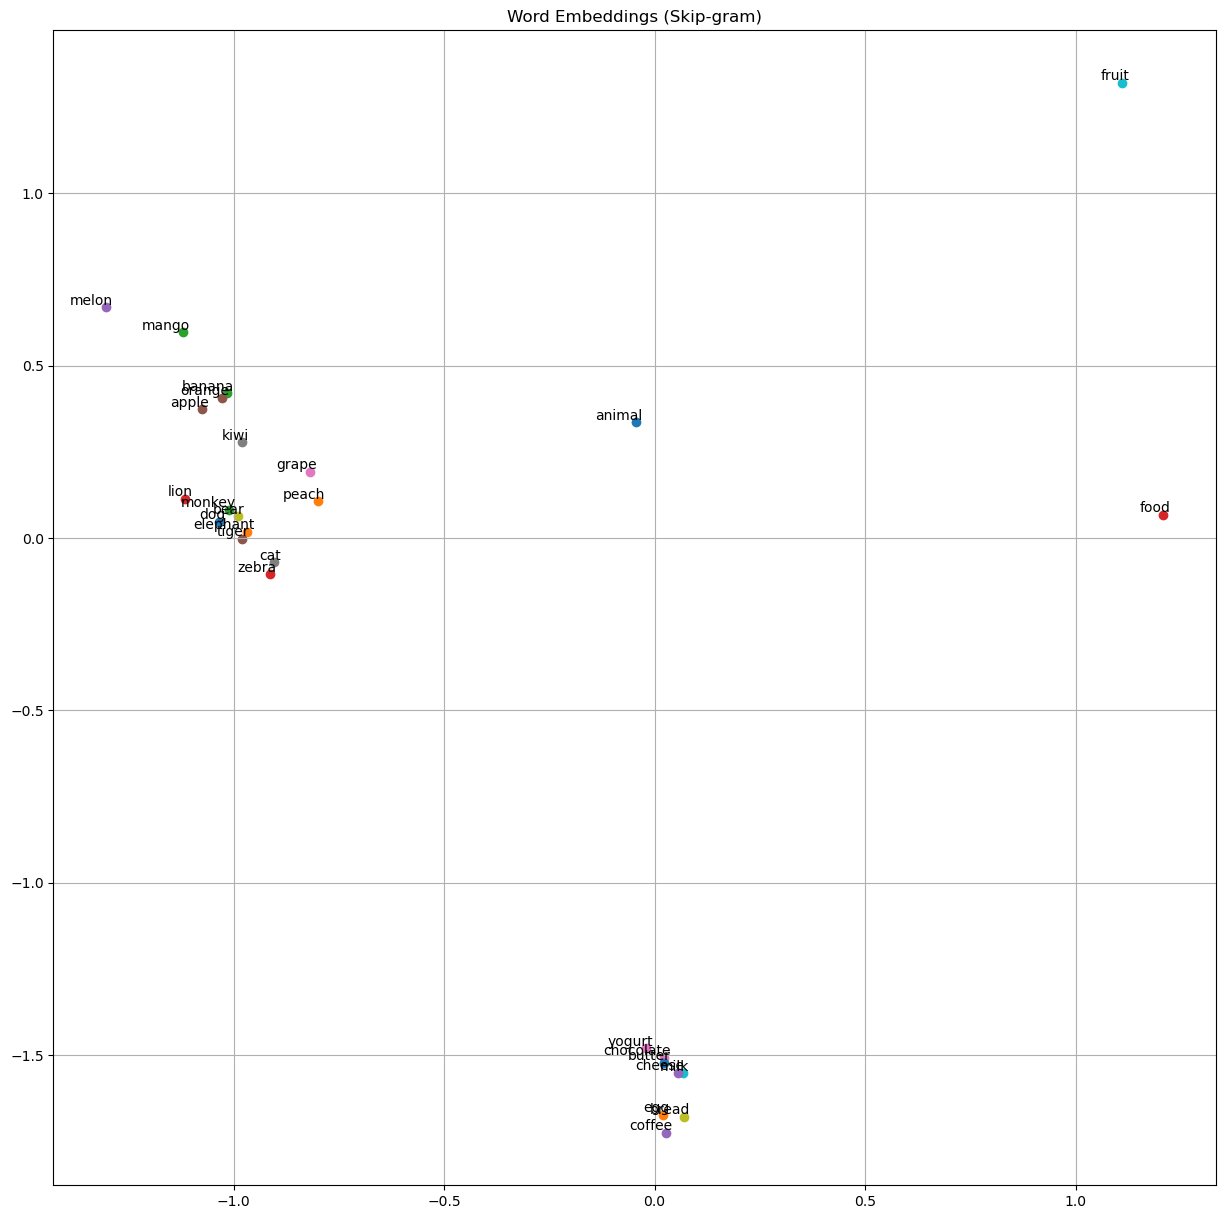

In [50]:
# Get learned word embeddings (columns of W)
W_weights = model.W.weight.data.T  # shape: [voc_size, embedding_size]
plt.figure(figsize=(15,15))

for i, label in enumerate(word_list):
    x, y = W_weights[i][0].item(), W_weights[i][1].item()
    plt.scatter(x, y)
    # plt.scatter(x, y, label=label)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,2), ha='right')

plt.title("Word Embeddings (Skip-gram)")
plt.grid(True)
# plt.legend()
plt.show()


### 7. **Embedding Extraction and Visualization**

```python
W_weights = model.W.weight.data.T
for i, label in enumerate(word_list):
    x, y = W_weights[i][0].item(), W_weights[i][1].item()
```

* `model.W.weight` contains the full **embedding matrix**.
* Since we used 2D embeddings, we can directly plot them using `matplotlib`.

Each word is a point in 2D space. Words with **similar context** will be **closer together**.

## ✅ Key Learnings

| Concept                        | Description                                       |
| ------------------------------ | ------------------------------------------------- |
| Skip-gram                      | Predict context words given a center word         |
| One-hot encoding               | Sparse input format where only one index is 1     |
| Embedding                      | Dense vector representation learned for each word |
| Softmax (via CrossEntropyLoss) | Predicts probability over vocab                   |
| Visualization                  | Useful for understanding how words relate         |

---

## 🧪 Example:

If “banana” appears near “fruit” and “orange” frequently, the learned vectors for those words will be close in 2D space.


In [51]:
import torch.nn.functional as F

def get_embedding_matrix(model):
    # Extract weights from the first linear layer (W)
    return model.W.weight.data.T  # shape: [vocab_size, embedding_dim]

def find_similar_words(input_word, word_dict, idx_to_word, model, top_k=3):
    if input_word not in word_dict:
        print(f"❌ '{input_word}' is not in the vocabulary.")
        return

    # Get word embedding for the input word
    embedding_matrix = get_embedding_matrix(model)
    input_idx = word_dict[input_word]
    input_vec = embedding_matrix[input_idx]

    # Compute cosine similarity with all word vectors
    cos_sim = F.cosine_similarity(input_vec.unsqueeze(0), embedding_matrix)

    # Get top-k similar words (excluding the word itself)
    top_k_idx = cos_sim.argsort(descending=True).tolist()

    print(f"🔍 Words similar to '{input_word}':")
    shown = 0
    for idx in top_k_idx:
        if idx != input_idx:
            print(f"  {idx_to_word[idx]} (score: {cos_sim[idx]:.4f})")
            shown += 1
            if shown == top_k:
                break


In [52]:
find_similar_words("banana", word_dict, idx_to_word, model)
find_similar_words("animal", word_dict, idx_to_word, model)

🔍 Words similar to 'banana':
  orange (score: 0.9999)
  apple (score: 0.9983)
  melon (score: 0.9966)
🔍 Words similar to 'animal':
  fruit (score: 0.6727)
  mango (score: 0.5834)
  melon (score: 0.5716)
